## 70. Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

 

## Example 1:

Input: n = 2

Output: 2

Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

## Example 2:

Input: n = 3

Output: 3

Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step
 

## Constraints:

1 <= n <= 45

## Instructor Data Structures and Helpers

These are data structures used in this notebook.

In [1]:
############################################################################
# INSTRUCTOR DATA STRUCTURES
# If you change these, don't break the instructor test block.
############################################################################
# Decorator example for counting function calls, adapted from 
# https://stackoverflow.com/a/21717396/8542716
def call_counter(f):
    """
    Adds a ".calls" variable to the function that increments w/every call.
    Set it to zero between iterations.  
    Example:
        @call_counter
        def sumallbelow(x):
          if x<1:
            return 0
          return x + sumallbelow(x-1)
        
        ...
        sumallbelow.calls = 0 # reset before any use
        print(f"The sum up to 4 is: {sumallbelow(4)}")
        print(f"and the call counts are {sumallbelow.calls}")

    """
    def wrapped(*args, **kwargs): # deal with any/all arguments
        wrapped.calls += 1
        return f(*args, **kwargs) # call the real function here
    wrapped.calls = 0
    return wrapped

class debugprint(object):
  """
  A debug print decorator useful for tracing the flow of recursive functions.
  It adds a "debugprint" method to each function call, that increases the 
  number of spaces on each call before printing the output.

  To use, add @debugprint on top of your function.  Then, within your function
  foo, put foo.debugprint("whatever"), and it will print "whatever" with 
  several spaces in front of it.  Recursive calls add to the spaces.  Enable
  with "debugprint.enabled = True", and disable w/False.

  There's also a counter called ".calls," which you reset like the counter
  decorator above.  Note, enabling/disabling does not affect the counter; the
  counter is always counting.

  Example:
      @debugprint
      def fib(N):
        fib.debugprint(f"inside fib({N})")
        if N<2:
          fib.debugprint(f"returning {N}")
          return N
        fib.debugprint(f"returning fib({N-1}) + fib({N-2})")
        return fib(N-1) + fib(N-2)

      # toggle this on/off as needed
      fib.enabled, fib.calls = True, 0
      print(f"The 3rd Fibonacci number is {fib(3)}")
      print(f"Number of calls is {fib.calls}")

  Output:
      inside fib(3)
      returning fib(2) + fib(1)
        inside fib(2)
        returning fib(1) + fib(0)
          inside fib(1)
          returning 1
          inside fib(0)
          returning 0
        inside fib(1)
        returning 1
      The 3rd Fibonacci number is 2
      Number of calls is 5

  Adapted from https://stackoverflow.com/a/862915/
  Also adding a calls counter because I cannot combine decorators
  """
  calls = 0
  enabled = False
  space = ""
  def __init__(self, func):
    self.func = func
  def __call__(self, *args, **kwargs):
    if self.enabled:
      # print 'Entering', self.func.func_name 
      # print '    args:', args, kwargs
      pass
    self.space += "  "
    self.calls += 1
    result = self.func(*args, **kwargs)
    self.space = self.space[:-2]
    return result
  def debugprint(self, *args, **kwargs):
    if self.enabled:
      print(self.space+" ".join(map(str,args)), **kwargs)

class Point(object):
    """
    Data structure for points.  Methods include P.x, P.y and other Pythonisms
    necessary to use with sets, tuples, etc.
    """
    def __init__(self, x, y): 
        self.x = x 
        self.y = y
    def __repr__(self):
        return f"Point({self.x},{self.y})" 
    def __eq__(self, other): # need both eq and hash if you want to use sets
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash((self.x, self.y))
    def __iter__(self): # required to convert to tuple
        for i in [self.x, self.y]:
          yield i

## Brute Force Climbing Stairs






In [12]:
class Solution(object):
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        return Solution.countWays(self, n + 1)
    
    def countWays(self, s):
        small_steps = 1
        large_steps = 2
        # ways_to_climb = 0
        if s <= 1:
            # ways_to_climb = ways_to_climb + 1
            return s
        return Solution.countWays(self, s - small_steps) + Solution.countWays(self, s - large_steps)
    
        

n = 38
Solution.climbStairs(0, n)

# helped me figure it out after i struggled to understand how to randomize the 1 to 
# 2 steps 
# https://www.geeksforgeeks.org/count-ways-reach-nth-stair/


63245986

## Faster Climbing Stairs

In [15]:
class Solution(object):
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        a, b = 0, 1
        for i in range(n):
            a, b = b, a + b
        return b  
    

n = 38
print(range(n))
for i in range(n):
    print(i)
Solution.climbStairs(0, n)

# helped me figure it out after i struggled to understand how to randomize the 1 to 
# 2 steps 
# https://www.geeksforgeeks.org/count-ways-reach-nth-stair/


range(0, 38)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


63245986

## Experiment Area
Here is where experiments can be run.

### Data Collection
This runs repeated tests over input sizes N to collect data for the plot section.

In [ ]:
from os import setuid
from random import randint

def getRuntime(func, inp):
  """
  Return the number of calls to dist() made to find the closest pair of 
  points using the given function and input array.
  
  func is the function to call (either closestPairBrute or closestPairCLRS)
  inp is array of points
  """
  try:
      calls=0
      tup = func(inp) # p1, p2, dist, calls
      p1, p2, d, dc = tup
      return dc
  except Exception as e:
      print(" ")
      print("======== EXCEPTION ======== EXCEPTION ======== EXCEPTION")
      print("========",e)

        
def generateTestData(n, max_coord, worst=False):
    """
    Update to repeat trials "worst" times to find something bad for brute force,
    then get the counts based on that.
    """
    mybrutecounts = []
    myCLRScounts = []
        
    for input_len in range(n):
      mbf = (0,[])
      rand_points = []
      if worst:
        pass
      else:
        # random set of points (no duplicates)
        rset = set()
        while len(rset) < input_len: 
            x, y = randint(0,max_coord), randint(0,max_coord)
            rset.add(Point(x, y))
        rand_points = list(rset)
      # Run both functions on the randomly-generated input to get the number of calls to dist()
      bftot = getRuntime(closestPairBrute, rand_points)
      mbf = max(mbf, (bftot, rand_points), key=lambda t: t[0])
      rand_points = mbf[1]
      if input_len==6: # just a spot-check
          rand_points.sort(key=lambda p: p.x)
          print(rand_points)
          print([d2.x-d1.x for d1, d2 in zip(rand_points, rand_points[1:])])
          _ = closestPairBrute(rand_points, True) # just to print it out
      mybrutecounts.append(getRuntime(closestPairBrute, rand_points))
      myCLRScounts.append(getRuntime(closestPairCLRS, rand_points))

    return mybrutecounts, myCLRScounts

# Just run this to generate the unfiltered output.  Then, if you want, 
# implement your worst case guess under "if worst:" in the code block above,
# put in code to simulate the worst case for the algorithm, then change
# False to True down here:
mybrutecounts, myCLRScounts = generateTestData(200, 1000, False)
print(mybrutecounts[:10])
print(myCLRScounts[:10])


### Plot
Here is the plot.

(0.0, 200.0, 0.0, 764.3856189774724)

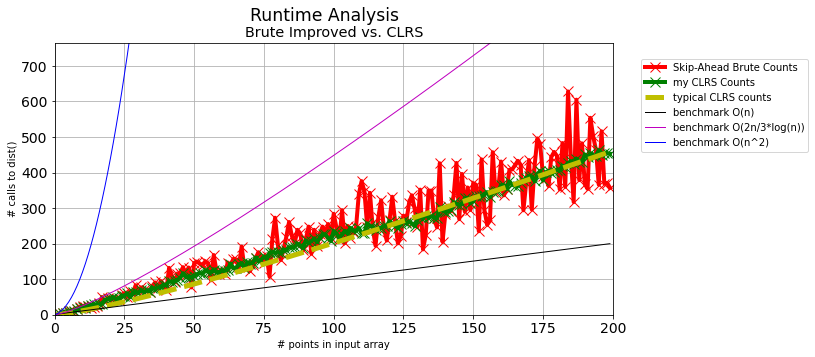

In [11]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial
# %matplotlib inline
import matplotlib.pyplot as plt

# REQUIRES mybrutecounts, myCLRScounts set above
N=len(mybrutecounts)

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # 1/3*n*log(n) for O(n/3*log(n))
yTestVals3 = [0,] # 2/3*n*log(n) for O(2n/3*log(n))
yTestVals4 = [0,] # n*log(n) for O(nlog(n))
yTestVals5 = [0,] # quadratic for O(n^2)

# generate bench mark data for O(n), O(3n/2), O(n/2*log(n)), O(nlog(n)), and O(n^2)
for i in range(2, N+1):
    # UPDATE THE COEFFICIENTS TO THESE FUNCTIONS TO BRING SOME IN "TIGHT" TO
    # THE BRUTE FORCE, and some to the CLRS, or add others.
    yTestVals1.append(i)
    yTestVals2.append(0.3*i*log2(i))  # change this benchmark
    yTestVals3.append(2*i/3*log2(i))
    yTestVals4.append(i*log2(i))
    yTestVals5.append(pow(i, 2))

# Brute vs. CLRS execution steps
plt.rcParams['figure.figsize'] = [10,5]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")
fig.patch.set_facecolor('xkcd:white')
# plotting nearest neighbor execution steps
ax1.set_title('Brute Improved vs. CLRS', size="x-large")
ax1.plot(range(N), mybrutecounts, "rx-", markersize=10, linewidth=4, label="Skip-Ahead Brute Counts")
if myCLRScounts[-1]:
  ax1.plot(range(N), myCLRScounts, "gx-", markersize=10, linewidth=4, label="my CLRS Counts")
ax1.plot(range(N), yTestVals2, "y--", markersize=0, linewidth=5, label="typical CLRS counts")
ax1.plot(range(N), yTestVals1, "k^-", markersize=0, linewidth=1, label="benchmark O(n)")
ax1.plot(range(N), yTestVals3, "m^-", markersize=0, linewidth=1, label="benchmark O(2n/3*log(n))")
# ax1.plot(range(N), yTestVals4, "y^-", markersize=0, linewidth=1, label="benchmark O(nlog(n))")
ax1.plot(range(N), yTestVals5, "b^-", markersize=0, linewidth=1, label="benchmark O(n^2)")
ax1.grid(b=True, which='major', axis='both')
ax1.set(xlabel = '# points in input array', ylabel = '# calls to dist()')
ax1.legend(loc=(1.05,0.60), scatterpoints=1)
ax1.tick_params(axis="both", which="major", labelsize=14)
ax1.axis([0,N,0,0.5*N*log2(N)]) 

### Challenge Questions
Why does the modified brute force appear to be as efficient as the known-optimal CLRS implementation?  Could it be that simply sorting the points frees us from the pesky $\Theta(n^2)$ bound?  Or is this an exaggerated stretch of the "O" bound in the $O(n^2)$ asymptotic relation?

Can you find an input that "breaks" it and brings it closer to its expected $n^2$ bound?  What is the general pattern of a "bad" input to the algorithm?  If so, would that same input affect CLRS as well?

Finally, what are the tradeoffs in using the skip-ahead brute force optimization, vs. the CLRS code?  Think of one reason to use skip-ahead over CLRS.  Hint, one reason has nothing to do with asymptotic behavior.